**Exercise on Regression Using Economic Data of Spain**

> The Regression You can Make:

        You can perform regression by setting the variables city, serie and year in the file main.py using one of the values indicated below for each of these variables.

> The Frameworks You Can Pick

        You can choose either linear regression using SciekitLearn or TensorFlow.

> The Years You Can Pick

      You can choose any year from 2003 to 2017.

> The Cities You Can Pick:

        A Coruña, Albacete, Alicante, Almería, Álava, Asturias, Ávila, Badajoz, Barcelona, Vizcaya, Burgos, Cáceres, Cádiz, Cantabria, Castellón, Ceuta, Ciudad Real, Córdoba, Cuenca, Guipúzcoa, Girona, Granada, Guadalajara, Huelva, Huesca, Baleares, Jaén, La Rioja, Las Palmas, León, Lleida, Lugo, Madrid, Málaga, Melilla, Murcia, Navarra, Ourense, Palencia, Pontevedra, Salamanca, Santa Cruz de Tenerife, Segovia, Sevilla, Soria, Tarragona, Teruel, Toledo, Valencia, Valladolid, Zamora, Zaragoza,

> The Metrics You Can Choose:

        Men Activity Percentage, Women Activity Percentage, Men Unemployment Percentage, Women Unemployment Percentage, Men Employment Percentage, Women Employment Percentage, Women Unemployment Percentage, Men employment Percentage, Women employment Percentage, Índice general. Variación mensual., Alimentos y bebidas no alcohólicas. Índice., Bebidas alcohólicas y tabaco. Índice., Vestido y calzado. Índice., Sanidad. Índice., Transporte. Índice., Comunicaciones. Índice., Ocio y cultura. Índice., Enseñanza. Índice., Restaurantes y hoteles. Índice., Otros bienes y servicios. Índice., Sin asalariados. Total de empresas. Total CNAE. Empresas., De 1 a 2. Total de empresas. Total CNAE. Empresas., De 3 a 5. Total de empresas. Total CNAE. Empresas., De 6 a 9. Total de empresas. Total CNAE. Empresas., De 10 a 19. Total de empresas. Total CNAE. Empresas., De 20 a 49. Total de empresas. Total CNAE. Empresas., De 50 a 99. Total de empresas. Total CNAE. Empresas., De 100 a 199. Total de empresas. Total CNAE. Empresas., De 200 a 499. Total de empresas. Total CNAE. Empresas., De 500 a 999. Total de empresas. Total CNAE. Empresas., De 1000 a 4999. Total de empresas. Total CNAE. Empresas., De 5000 o más asalariados. Total de empresas. Total CNAE. Empresas., Total. Total de empresas. Total CNAE. Empresas.,

  > About the Directories: 📂
   
        The folder Input contains the dataset, while the folder Output contains two subfolders SL and FL. Each of these two sufolders contains the numerical and graphical results of the training and testing of the linear regression model using SciekitLearn or TensorFlow, respectively.



> Make sure to upload:
  - data.csv
  - LR_INIT.py
  - LR_SL.py

**Task Description:**
  - Try the regressor with several algorithm configurations for the same metric.
  - Try several data series for the same metric.
  - Try several metrics for the same series and see how the regressor learns.

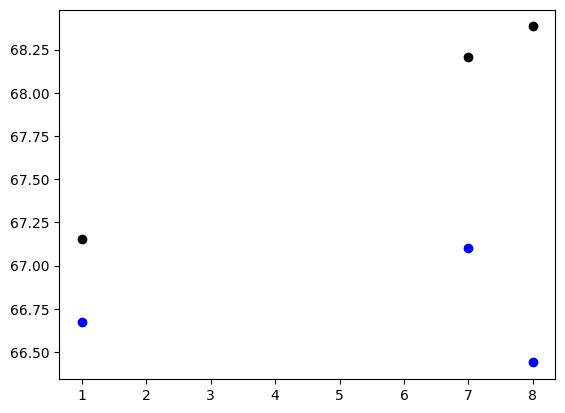

----------------------------------------
The Evaluation Metrics of the Linear Regression
----------------------------------------
The Mean Absolute Error Value is: 1.1754345006485067
The Mean Squared Error is: 1.7420882203897075
The Root Mean Squared Error is:1.3198818963792585


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import os.path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import subprocess
from LR_INT import LR_INT
from LR_SL import LR_SL
from LR_TF import LR_TF


class LR_SL(LR_INT):
    """
    implement linear regression using Scikitlean
    """
    def __init__(self):
        self.k = 1
        self.y_test = []
        self.y_pred = []

    def linear_regression(self, *args):
        threshold = args[0];
        city = args[1];
        serie = args[2];
        year = args[3];
        show = args[4];
        df = pd.read_csv('data.csv')  # import the CSV
        df2 = df.loc[(df['location_name'] == city) & (df['serie_name'] == serie) & (df['year'] == year)] # just change the name of the city, serie and year you want to predict
        if len(df2['value']) > threshold:
            # example by wrking on a smaller dataset. For each instruction is the same explanation as above
            df2 = df[:][:threshold]  # selec only 500 datasets
        #sns.lmplot(x="period", y="value", data=df2, order=2, ci=None)  # plots the scatter plot
        #df2.fillna(method='ffill', inplace=True)  # eliminates the Nans
        # Training the model
        x = np.array(df2['period']).reshape(-1, 1)  # reshape the vector into an np array: this the feature
        y = np.array(df2['value']).reshape(-1, 1)  # reshape the vector into an array: this is the target
        #df2.dropna(inplace=True)  # removes all the rows with Null in it
        X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25)  # its a method of sciekitlearn to split the dataset into training and testing, where 0.25 corresponds to the percentage of the datasamples to be considered as testing set
        # it splits the x and y each one appart. It will produce two training sets and two testing sets for "period" and for "value".
        regr = LinearRegression()  # create the object linearRegression of scikitlearn
        regr.fit(X_train, y_train)  # this trains the linear model, meaning making the linear model fit the data
        #print(regr.score(X_test,y_test))  # I think the higher the value, the better. NB: this return the coefficient of determination R^2 defined as (1-U/V) => full defintion of U and V available here https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
        y_pred = regr.predict(X_test)  # this predicts the y prediction using the linear regression model, its the line!
        plt.scatter(X_test, y_test, color='b')  # plot the original features and the target
        plt.scatter(X_test, y_pred, color='k')  # plot the training features and the predicted target
        self.y_pred = y_pred
        self.y_test = y_test
        plt.show()  # it does not fit well so the data is not suitable for linear regression. IF so happens, one can try to reduce the data we are working on



    def display_result(self,*args):
        y_test = args[0];
        y_pred = args[1];
        city = args[2];
        serie = args[3];
        year = args[4];
        verbose = args[5];
        # the evaluation metrics for regression models: MAE and MSE: Mean Absolute Error and Mean Square Error, and Root Mean Square error
        mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
        mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
        rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
        if verbose ==1:
            print("----------------------------------------")
            print("The Evaluation Metrics of the Linear Regression")
            print("----------------------------------------")
            print(f"The Mean Absolute Error Value is: {mae}")
            print(f"The Mean Squared Error is: {mse}")
            print(f"The Root Mean Squared Error is:{rmse}")
        else:
            txt_name = "../Output/SL/sl_linear_prediction"+city+"_"+ serie +"_" + str(year) +".txt"
            subprocess.run(["touch",txt_name]) # create the txt to store the results
            with open(txt_name,'w') as f:
                f.write("The Mean Absolute Error Value is:"+ str(mae))
                f.write('\n')
                f.write("The Mean Squared Error is:"+ str(mse))
                f.write('\n')
                f.write("The Root Mean Squared Error is:"+ str(rmse))


def main():
    """
    Help:
    Common paramters:
        city: choose one of the 52 cities available (e.g. Ceuta)
        serie: choose one of the 33 seconomical metrics (e.g. companies with X employees, etc).
        year: choose a year from 2003 to 2007
        verbose: set to "1" if you want visual display of the results and "0" if you want to store the results in files
        Frame: set to "1" for scikit learn and "0" for tensorflow linear regression
    Tensorflow parameters:
        lr: the learning rate of the gradient decent.
        training epochs: for how many epochs the training is performed.
        display_rate: the laps of iterations at which we recover the log of the execution
    """
    # -_-_-_-_-_-_- Parameters _-_-_-_-_-_-_-_-_-_-_

    frame = 1;
    city  = "Ceuta"
    serie = "Men Activity Percentage"
    year = 2003
    verbose = 1
    lr = 0.01 # the learning rate of the gradient descent
    train_epochs = 2000 # training epochs
    display_rate = 200 # onl

    # _-_-_-_-_-_ The call to the univariate linear regression _-_-_-_-__-_-
    test_frame = lambda frame: frame == 1;
    var = LR_SL() if test_frame(frame) == True else LR_TF();
    var.linear_regression(500,city,serie,year,verbose,lr,train_epochs,display_rate)

    if  test_frame(frame):
       var.display_result(var.y_test, var.y_pred, city, serie, year, verbose)
    else:
      var.display_result(var.log,var.training_cost,var.testing_cost,city,serie,year,var.W,var.B,var.train_x,var.train_y, var.test_x, var.test_y, verbose)

if __name__ == "__main__":
    main()